In [24]:
from PINNs import *
import torch
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS


dtype=torch.float64
setup_seed(6)
device = cuda
 
def train(epoch):
    def closure():
        optimizer.zero_grad()                                                     # Optimizer
       # (x_int_train,x_int_train) = lazy(x_int_train,x_int_train ,batch=0) 
        loss_pde = model.loss_pde(x_int_train)                                    # Loss function of PDE
        loss_ic = model.loss_ic(x_ic_train, rho_ic_train,u_ic_train,v_ic_train,p_ic_train)   # Loss function of IC
        loss_bc = model.loss_ic(x_bc, rho_bc,u_bc,v_bc,p_bc)   # Loss function of IC
        #loss_period = model.loss_period(x_bcL_train,x_bcR_train)   # Loss function of IC
        #loss_con = model.loss_con(x_ic_train,xen)
        #loss_cut = model.loss_bc1(x_cut_train,rho_cut_train,u_cut_train,v_cut_train,p_cut_train) 
#        loss_bdI = model.bd_B(x_bcI_train, sin_bcI_train,cos_bcI_train)  
        #loss_bdL = model.loss_bc_cons(x_bcL_train, rho_inf,u_inf,v_inf,p_inf) 
        #loss_bdR = model.loss_bc_cons(x_bcR_train, rho_inf,u_inf,v_inf,p_inf) 
        #loss_bdD = model.loss_bc_cons(x_bcD_train, rho_inf,u_inf,v_inf,p_inf) 
        #loss_bdU = model.loss_bc_cons(x_bcU_train, rho_inf,u_inf,v_inf,p_inf) 

        loss_ib = loss_ic  +loss_bc # +  loss_bdL +loss_bdR +loss_bdU+loss_bdD   #+loss_bdL
        loss = loss_pde + 10* loss_ib#+loss_period

        # Print iteration, loss of PDE and ICs
        print(f'epoch {epoch} loss_pde:{loss_pde:.8f}, loss_ib:{loss_ib:.8f}')
        loss.backward()
        return loss
    loss = optimizer.step(closure)
    return loss

    

lr = 0.001 
num_ib = 10000 
num_int =400000
Tend = 1.0
Lx = 5.00
Lx1 = 0.0
Ly = 5.0
Ly1 =0.0
rx = 0.5
ry = 1.0
rd = 0.25


xlimits = np.array([[0.,Tend],[Lx1, Lx], [Ly1,Ly]])  #interal
sampling = LHS(xlimits=xlimits)
x_int_train = sampling(num_ib)
#A = []
#for i in range(num_ib):
#    x = x_int_train[i,1]
#    y = x_int_train[i,2]
# #   if ((x - rx)>0 and (x-rx)<1):
# #       y1,y2,dy1,dy2 = Naca0012data(x-rx)
# #       if ((y-ry)>y2 and (y-ry)<y1):
# #           A.append(i)
#x_int_train = np.delete(x_int_train,A,axis=0)

#xlimits = np.array([[0.,Tend],[0, 2], [Ly1,Ly]])  #interal
#sampling = LHS(xlimits=xlimits)
#x_int_train1 = sampling(num_int)
#A = []
#for i in np.shape(num_int):
#    x = x_int_train1[i,1]
#    y = x_int_train1[i,2]
#    if ((x - rx)>0 and (x-rx)<1):
#        y1,y2,dy1,dy2 = Naca0012data(x-rx)
#        if ((y-ry)>y2 and (y-ry)<y1):
#            A.append(i)
#x_int_train1 = np.delete(x_int_train1,A,axis=0)
#
#x_int_train = np.concatenate((x_int_train,x_int_train1),axis=0)


xlimits = np.array([[0.,0.0],[Lx1,Lx], [Ly1,Ly]])  #interal
sampling = LHS(xlimits=xlimits)
x_ic_train = sampling(num_ib)
#A = []
#for i in range(num_ib):
#    x = x_ic_train[i,1]
#    y = x_ic_train[i,2]
#    if ((x - rx)>0 and (x-rx)<1):
#        y1,y2,dy1,dy2 = Naca0012data(x-rx)
#        if ((y-ry)>y2 and (y-ry)<y1):
#            A.append(i)
#x_ic_train = np.delete(x_ic_train,A,axis=0)
#
#x_ic_pre=np.copy(x_ic_train)
#x_ic_pre[:,0] = 5.0

#x_bcI_train,sin_bcI_train,cos_bcI_train = BD_naca0012(Tend,rx,ry,num_ib)
rho_ic_train, u_ic_train,v_ic_train, p_ic_train = IC_Vortex(x_ic_train)

xlimits = np.array([[0.0,Tend],[Lx1, Lx1], [Ly1,Ly]])
sampling = LHS(xlimits=xlimits)
x_bcL_train =  sampling(num_ib)
xlimits = np.array([[0.0,Tend],[Lx, Lx], [Ly1,Ly]])
sampling = LHS(xlimits=xlimits)
x_bcR_train =  sampling(num_ib)
xlimits = np.array([[0.0,Tend],[Lx1, Lx], [Ly,Ly]])
sampling = LHS(xlimits=xlimits)
x_bcU_train =  sampling(num_ib)
xlimits = np.array([[0.0,Tend],[Lx1, Lx], [Ly1,Ly1]])
sampling = LHS(xlimits=xlimits)
x_bcD_train =  sampling(num_ib)


x_bc = np.append(x_bcL_train,x_bcD_train,axis=0)
#x_bc = np.append(x_bc,x_bcU_train,axis=0)
#x_bc = np.append(x_bc,x_bcR_train,axis=0)


x_bcR_train =  Data_move(x_bcL_train,0,Lx-Lx1,0)

rho_bc, u_bc,v_bc, p_bc = IC_Vortex(x_bc)
xen =  Data_move(x_ic_train,Tend,0,0)

#rho_bcL_train, u_bcL_train,v_bcL_train, p_bcL_train = IC_Vortex(x_bcL_train)  

x_int_train = torch.tensor(x_int_train, requires_grad=True, dtype=dtype).to(cuda)
#x_bcI_train = torch.tensor(x_bcI_train, requires_grad=True, dtype=dtype).to(device)
#sin_bcI_train = torch.tensor(sin_bcI_train, dtype=dtype).to(device)
#cos_bcI_train = torch.tensor(cos_bcI_train, dtype=dtype).to(device)

#rho_ic_train = torch.tensor(rho_ic_train, dtype=torch.float32).to(device)
#u_ic_train = torch.tensor(u_ic_train, dtype=torch.float32).to(device)
#v_ic_train = torch.tensor(v_ic_train, dtype=torch.float32).to(device)
#p_ic_train = torch.tensor(p_ic_train, dtype=torch.float32).to(device)
x_ic_train = torch.tensor(x_ic_train, dtype=dtype).to(device)
xen= torch.tensor(xen, dtype=dtype).to(device)
#x_ic_pre = torch.tensor(x_ic_pre, dtype=torch.float32).to(device)

#rho_bcL_train = torch.tensor(rho_bcL_train, dtype=dtype).to(device)
#u_bcL_train = torch.tensor(u_bcL_train, dtype=dtype).to(device)
#v_bcL_train = torch.tensor(v_bcL_train, dtype=dtype).to(device)
#p_bcL_train = torch.tensor(p_bcL_train, dtype=dtype).to(device)
x_bcL_train = torch.tensor(x_bcL_train,requires_grad=True, dtype=dtype).to(cuda)
x_bcR_train = torch.tensor(x_bcR_train,requires_grad=True, dtype=dtype).to(cuda)
x_bcD_train = torch.tensor(x_bcD_train,requires_grad=True, dtype=dtype).to(cuda)
x_bc = torch.tensor(x_bc, dtype=dtype).to(cuda)


#print('Start training...')
#
#model1 = torch.load(model_path, map_location=torch.device('cpu'))
#model1 = model1.to(device)

#U_ic = to_numpy(model1(x_ic_pre))
#rho_ic_train, p_ic_train,u_ic_train,v_ic_train = U_ic[:, 0], U_ic[:, 1], U_ic[:, 2],U_ic[:,3]            # rho, u, p - initial condition

rho_ic_train = torch.tensor(rho_ic_train, dtype=dtype).to(cuda)
u_ic_train = torch.tensor(u_ic_train, dtype=dtype).to(cuda)
v_ic_train = torch.tensor(v_ic_train, dtype=dtype).to(cuda)
p_ic_train = torch.tensor(p_ic_train, dtype=dtype).to(cuda)

rho_bc = torch.tensor(rho_bc, dtype=dtype).to(cuda)
u_bc = torch.tensor(u_bc, dtype=dtype).to(cuda)
v_bc = torch.tensor(v_bc, dtype=dtype).to(cuda)
p_bc = torch.tensor(p_bc, dtype=dtype).to(cuda)


In [25]:
np.shape(x_bcR_train)

torch.Size([10000, 3])

In [26]:
model = PINNs_WE_Euler_2D(Nl=6,Nn=90).to(cuda).double()
##model_path = 'naca0012_step6.pth'
model = model.to(cuda)

#lr = 0.001
#optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#epochs = 2000
#tic = time.time()
#for epoch in range(1, epochs+1):
#    train(epoch)
#toc = time.time()
##print(f'Total training time: {toc - tic}')
#
optimizer = torch.optim.LBFGS(model.parameters(),lr=0.5,max_iter=30)
#
epochs = 500
tic = time.time()
for epoch in range(1, epochs+1):
    train(epoch)
toc = time.time()
print(f'Total training time: {toc - tic}')

#model_path = 'Vortex.pth'
#torch.save(model.to('cpu'), model_path)


epoch 1 loss_pde:0.00072868, loss_ib:8.81798712
epoch 1 loss_pde:0.00073185, loss_ib:8.72398874
epoch 1 loss_pde:0.02693146, loss_ib:1.14934777
epoch 1 loss_pde:0.18658156, loss_ib:0.58659535
epoch 1 loss_pde:0.12264105, loss_ib:0.36682330
epoch 1 loss_pde:0.10643649, loss_ib:0.33892857
epoch 1 loss_pde:0.09332722, loss_ib:0.32401033
epoch 1 loss_pde:0.08123057, loss_ib:0.31321100
epoch 1 loss_pde:0.06768420, loss_ib:0.30179326
epoch 1 loss_pde:0.05222872, loss_ib:0.28790170
epoch 1 loss_pde:0.03681900, loss_ib:0.27132353
epoch 1 loss_pde:0.02333450, loss_ib:0.24985558
epoch 1 loss_pde:0.01566148, loss_ib:0.22675193
epoch 1 loss_pde:0.01762758, loss_ib:0.21566015
epoch 1 loss_pde:0.01929531, loss_ib:0.21325793
epoch 1 loss_pde:0.02136393, loss_ib:0.21068568
epoch 1 loss_pde:0.02541410, loss_ib:0.20590901
epoch 1 loss_pde:0.02981606, loss_ib:0.20139037
epoch 1 loss_pde:0.03055141, loss_ib:0.19930260
epoch 1 loss_pde:0.03133792, loss_ib:0.19726627
epoch 1 loss_pde:0.03135251, loss_ib:0.1

In [41]:
Nd = 100
T = 1.0
t = np.linspace(T, T, 1)                                   # Partitioned spatial axis
x = np.linspace(0.0,Lx,Nd)                                   # Partitioned spatial axis
y = np.linspace(0.0,Ly,Nd)                                   # Partitioned spatial axis
t_grid,x_grid,y_grid = np.meshgrid(t,x,y)                                    # (t,x) in [0,0.2]x[a,b]
T = t_grid.flatten()[:, None]                                         # Vectorized x_grid
X = x_grid.flatten()[:, None]                                         # Vectorized x_grid
Y = y_grid.flatten()[:, None]                                         # Vectorized x_grid
x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain

device = torch.device('cuda')
x_test = torch.tensor(x_test, dtype=dtype).to(device)
u = to_numpy(model(x_test))
#Xp,Yp = meshgrid(x,y)


x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
uo1 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,1]
uo2 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,2]
uo3 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
#uo4 = ue.flatten()[:,None]
rhoE,uE,vE,pE = Exact_Vortex(x_test)
u_exact = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        u_exact[i,j] = rhoE[i*Nd+j]
uave = np.sqrt(sum(rhoE**2)/np.size(rhoE))
uerr = abs(ue-u_exact)/uave
var2 = """TITLE="Euler"
 VARIABLES="x","y","rho","exact","error"
ZONE I=         100 J=         100 F=POINT
"""
filename = "vortex.dat" 
#uxy= np.hstack((X, Y,ue)) 
uxy= np.hstack((X, Y,ue.flatten()[:,None], u_exact.flatten()[:,None],uerr.flatten()[:,None])) 
f = open(filename,'w')
f.write(var2)
np.savetxt(f, uxy)# Vectorized whole domain
f.close()


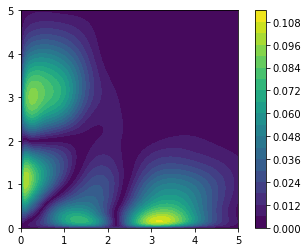

In [42]:
plt.figure()
cset = plt.contourf(x_grid[:,0,:],y_grid[:,0,:],abs(ue-u_exact)/uave,20)
#plt.contourf(x_grid[:,0,:],y_grid[:,0,:],u_exact,20)
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.colorbar(cset, ax=ax)
plt.show()

In [43]:
np.max(abs(ue-u_exact)/uave)

0.10858958845865035

In [44]:
np.sum(abs(ue-u_exact)/uave)/np.size(ue)

0.019591010017281463

: 

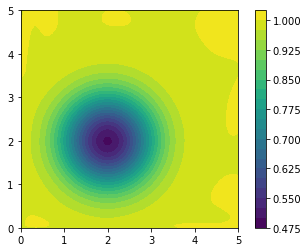

In [38]:
plt.figure()
cset = plt.contourf(x_grid[:,0,:],y_grid[:,0,:],ue,20)
#plt.contourf(x_grid[:,0,:],y_grid[:,0,:],u_exact,20)
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.colorbar(cset, ax=ax)
plt.show()

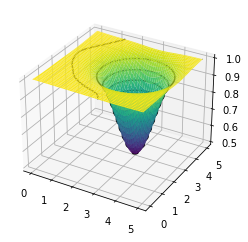

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid[:,0,:],y_grid[:,0,:],ue, cmap='viridis')
ax.contour(x_grid[:,0,:],y_grid[:,0,:],ue,  levels=10, colors='black')
plt.show()

In [ ]:
l2_relative_error(rhoE)

# Exact solution

In [8]:

u_inf = 1
v_inf = 1
def Exact_Vortex(x):
  N =x.shape[0]
  rho_init = np.zeros((x.shape[0]))
  u_init = np.zeros((x.shape[0])) 
  v_init = np.zeros((x.shape[0]))
  p_init = np.zeros((x.shape[0]))
  x0 = 2.0
  y0 = 2.0
  GAMMA = 1.4
  b = 5.0
  pi = math.pi


  for i in range(N):
    rx = x[i,1] - x0 -u_inf*x[i,0]
    ry = x[i,2] - y0 -v_inf*x[i,0]
    #if rx < -5:
    #    rx += 10
    #elif rx > 5:
    #    rx -= 10
    rsq = rx * rx + ry * ry
    rho_init[i] = math.pow(1.0 - ((GAMMA - 1.0) * b * b) / (8.0 * GAMMA * pi * pi) * math.exp(1.0 - rsq),
                   1.0 / (GAMMA - 1.0))
    p_init[i] = math.pow(rho_init[i], GAMMA)
    du = -b / (2.0 * pi) * math.exp(0.5 * (1.0 - rsq)) * ry
    dv = b / (2.0 * pi) * math.exp(0.5 * (1.0 - rsq)) * rx
    u_init[i] = u_inf + du
    v_init[i] = v_inf + dv
     # u0[p] = rho
     # u1[p] = rho * u
     # u2[p] = rho * v
     # u3[p] = P / (GAMMA - 1.0) + 0.5 * rho * (u * u + v * v)
  return rho_init, u_init, v_init,p_init


In [16]:
rhoE,uE,vE,pE = Exact_Vortex(x_test)